# Milestone 1
- Muhammad Nafisa Fakhri
- FTDS Batch 013

Link heroku: https://h8dsft-milestone1-mnfakhri.herokuapp.com/

### Latar Belakang
Presiden Amerika Serikat bersama dengan Kementrian Perhubungan Amerika Serikat di penghujung tahun sedang mengevaluasi angka kecelakaan yang terjadi selama tahun 2016. Dari hasil evaluasi tersebut ditemukan bahwa angka kecelakaan pada tahun 2016 sangat tinggi, hal ini menyebabkan terjadinya banyak korban di jalan raya. Presiden menugaskan Kementrian Perhubungan untuk mencari tahu kondisi apa yang menyebabkan terjadinya banyak kecelakaan dan Presiden menginstruksikan Kementrial Perhubungan untuk membuat kebijakan baru untuk tahun depan agar angka kecelakaan menjadi berkurang.

### Identifikasi Masalah

Kementrian Perhubungan Amerika Serikat ingin mengetahui kondisi kecelakaan yang terjadi berdasarkan persebaran letak kecelakaan, letak persimpangan, letak jalan lalu lintas, kondisi pencahayaan, kondisi cuaca, jumlah korban kecelakaan yang fatal, jumlah pengemudi yang berada dalam pengaruh minuman keras. 

Kementrian Perhubungan percaya bahwa rata-rata jumlah kecelakaan yang menyebabkan kecelakaan fatal sama dengan rata-rata jumlah pengemudi yang dalam pengaruh minuman keras karena Kementrian Perhubungan percaya bahwa penyebab terjadi kecelakaan yang fatal disebabkan oleh pengemudi yang berada dalam pengaruh minuman keras.

Masalah yang menyebabkan terjadinya kecelakaan digambarkan oleh fish bone diagram

<img src="Diagram Fish Bone Milestone 1 New.jpg">

Penjelasan: 
- Penyebab terjadi nya kecelakaan yang tinggi secara umum dibagi menjadi 4 faktor, yaitu faktor manusia, faktor lingkungan, faktor peralatan dan faktor peraturan
- Dalam faktor manusia, terdapat faktor bagian yang menyebabkan terjadinya kecelakaan yaitu berkendara dalam keadaan mabuk.
- Dalam faktor lingkungan terdapat beberapa faktor bagian yang menyebabkan terjadinya kecelakaan diantaranya cuaca buruk, jalan tidak terlihat seperti terdapat kabut dan jalan tidak bersih.
- Dalam faktor peralatan terdapat beberapa faktor bagian yang menyebabkan terjadinya kecelakaan diantaranya tidak adanya rambu lalu-lintas dan lampu penerangan rusak.
- Dalam faktor peraturan terdapat beberapa faktor bagian yang menyebabkan terjadinya kecelakaan diantaranya peraturan tidak ditegakan dan tidak adanya peraturan lebih dalam mengenai cara berlalu-lintas di jalan.

### Batasan Masalah
- Data yang diolah hanya data "state_number","state_name","latitude","longitude","relation_to_junction_specific_location_name","relation_to_trafficway_name",
"light_condition_name","atmospheric_conditions_1_name","atmospheric_conditions_2_name","atmospheric_conditions_name",
"number_of_fatalities"

### Data Loading and Queries

SQL Query: 
```
SELECT state_number,state_name,latitude,longitude,relation_to_junction_specific_location_name,relation_to_trafficway_name,
light_condition_name,atmospheric_conditions_1_name,atmospheric_conditions_2_name,atmospheric_conditions_name,
number_of_fatalities,number_of_drunk_drivers 
FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2016`;
```

In [1]:
from scipy import stats
from plotly import graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
init_notebook_mode(connected=True)

In [2]:
data_mentah = pd.read_csv("h8dsft_milestone1_dataset_mnfakhri.csv")
data_mentah.head()

state_number state_name   latitude   longitude  \
0            56    Wyoming  41.742200 -106.494300   
1            16      Idaho  42.609000 -114.356000   
2             5   Arkansas  35.284200  -93.095453   
3            48      Texas  29.979078  -95.277997   
4            12    Florida  26.275011  -80.125189   

  relation_to_junction_specific_location_name relation_to_trafficway_name  \
0                                Non-Junction                 On Roadside   
1                                Non-Junction                   On Median   
2                  Entrance/Exit Ramp Related                  On Roadway   
3                                Non-Junction                   Separator   
4                                Non-Junction                 On Roadside   

  light_condition_name atmospheric_conditions_1_name  \
0   Dark – Not Lighted                          Snow   
1             Daylight                        Cloudy   
2   Dark – Not Lighted                         Clear   
3             Daylight                         Clear   
4             Daylight                         Clear   

          atmospheric_conditions_2_name atmospheric_conditions_name  \
0                          Blowing Snow                        Snow   
1                          Blowing Snow                Blowing Snow   
2  No Additional Atmospheric Conditions                       Clear   
3  No Additional Atmospheric Conditions                       Clear   
4  No Additional Atmospheric Conditions                       Clear   

   number_of_fatalities  number_of_drunk_drivers  
0                     1                        0  
1                     2                        0  
2                     1                        0  
3                     1                        0  
4                     1                        0

In [3]:
data_mentah.tail()

state_number  state_name  latitude  longitude  \
34743             4     Arizona   99.9999   999.9999   
34744             4     Arizona   99.9999   999.9999   
34745            53  Washington   99.9999   999.9999   
34746             4     Arizona   99.9999   999.9999   
34747             4     Arizona   99.9999   999.9999   

      relation_to_junction_specific_location_name relation_to_trafficway_name  \
34743                                     Unknown                     Unknown   
34744                                     Unknown                     Unknown   
34745                                     Unknown                     Unknown   
34746                                     Unknown                     Unknown   
34747                                     Unknown                     Unknown   

          light_condition_name atmospheric_conditions_1_name  \
34743                  Unknown                  Not Reported   
34744                 Daylight                  Not Reported   
34745  Dark – Unknown Lighting                  Not Reported   
34746                  Unknown                  Not Reported   
34747                  Unknown                  Not Reported   

              atmospheric_conditions_2_name atmospheric_conditions_name  \
34743  No Additional Atmospheric Conditions                Not Reported   
34744  No Additional Atmospheric Conditions                Not Reported   
34745  No Additional Atmospheric Conditions                Not Reported   
34746  No Additional Atmospheric Conditions                Not Reported   
34747  No Additional Atmospheric Conditions                Not Reported   

       number_of_fatalities  number_of_drunk_drivers  
34743                     1                        0  
34744                     1                        0  
34745                     1                        1  
34746                     1                        0  
34747                     1                        1

In [4]:
data_mentah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34748 entries, 0 to 34747
Data columns (total 12 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   state_number                                 34748 non-null  int64  
 1   state_name                                   34748 non-null  object 
 2   latitude                                     34748 non-null  float64
 3   longitude                                    34748 non-null  float64
 4   relation_to_junction_specific_location_name  34748 non-null  object 
 5   relation_to_trafficway_name                  34748 non-null  object 
 6   light_condition_name                         34748 non-null  object 
 7   atmospheric_conditions_1_name                34748 non-null  object 
 8   atmospheric_conditions_2_name                34748 non-null  object 
 9   atmospheric_conditions_name                  34748 non-null  object 
 10

Berdasarkan data loading dan pencarian informasi data secara umum, didapatkan bahwa data tersebut tidak memiliki nilai missing value, oleh karena itu dalam kasus ini tidak diperlukannya proses cleaning data.

In [5]:
data_mentah.sort_values(by="state_number",inplace=True)
data_mentah.reset_index(drop=True,inplace=True)
data_mentah.rename(columns={"state_number":"State Number","state_name":"State Name","latitude":"Latitude","longitude":"Longitude",
                            "relation_to_junction_specific_location_name":"Junction Location",
                            "relation_to_trafficway_name":"Trafficway Location","light_condition_name":"Light Condition",
                            "atmospheric_conditions_1_name":"Atmosphere Condition 1",
                            "atmospheric_conditions_2_name":"Atmosphere Condition 2","atmospheric_conditions_name":
                            "Atmosphere Conditions","number_of_fatalities":"Amount Of Fatality","number_of_drunk_drivers":
                            "Amount Of Drunk Drivers"},inplace=True)
data_mentah.head()

State Number State Name   Latitude  Longitude   Junction Location  \
0             1    Alabama  33.716089 -86.823714        Non-Junction   
1             1    Alabama  34.685433 -85.995672        Non-Junction   
2             1    Alabama  30.725353 -88.120125        Non-Junction   
3             1    Alabama  32.987678 -87.787614  Entrance/Exit Ramp   
4             1    Alabama  32.343083 -86.120122        Non-Junction   

  Trafficway Location     Light Condition Atmosphere Condition 1  \
0           On Median  Dark – Not Lighted                  Clear   
1          On Roadway  Dark – Not Lighted                  Clear   
2          On Roadway            Daylight                  Clear   
3          On Roadway            Daylight                  Clear   
4          On Roadway            Daylight                  Clear   

                 Atmosphere Condition 2 Atmosphere Conditions  \
0  No Additional Atmospheric Conditions                 Clear   
1  No Additional Atmospheric Conditions                 Clear   
2  No Additional Atmospheric Conditions                 Clear   
3  No Additional Atmospheric Conditions                 Clear   
4  No Additional Atmospheric Conditions                 Clear   

   Amount Of Fatality  Amount Of Drunk Drivers  
0                   1                        0  
1                   1                        0  
2                   1                        0  
3                   1                        0  
4                   1                        0

### Data Exploration

In [6]:
array_kolom = np.array(data_mentah.columns)
array_kolom

array(['State Number', 'State Name', 'Latitude', 'Longitude',
       'Junction Location', 'Trafficway Location', 'Light Condition',
       'Atmosphere Condition 1', 'Atmosphere Condition 2',
       'Atmosphere Conditions', 'Amount Of Fatality',
       'Amount Of Drunk Drivers'], dtype=object)

In [7]:
def buat_grafik(i,j):
    colours = ['#00FFFF', '#7FFFD4', '#000000', '#0000FF', '#8A2BE2', '#A52A2A','#DEB887', '#5F9EA0', '#7FFF00', '#D2691E',
                '#FF7F50', '#6495ED', '#DC143C', '#00FFFF', '#00008B', '#008B8B', '#B8860B', '#A9A9A9', '#006400', '#BDB76B',
                '#8B008B', '#556B2F', '#FF8C00', '#9932CC', '#8B0000', '#E9967A', '#8FBC8F', '#483D8B', '#2F4F4F', '#00CED1',
                '#9400D3', '#FF1493', '#00BFFF', '#696969', '#1E90FF', '#B22222', '#228B22', '#FF00FF', '#FFD700', '#DAA520',
                '#808080', '#008000', '#ADFF2F', '#FF69B4', '#CD5C5C', '#4B0082', '#F0E68C', '#7CFC00', '#ADD8E6', '#F08080',
                '#90EE90', '#FFB6C1', '#FFA07A', '#20B2AA', '#87CEFA', '#778899', '#B0C4DE', '#00FF00', '#32CD32', '#FF00FF',
                '#800000', '#66CDAA', '#0000CD', '#BA55D3', '#9370DB', '#3CB371', '#7B68EE', '#00FA9A', '#48D1CC', '#C71585',
                '#191970', '#FFE4B5', '#FFDEAD', '#000080', '#808000', '#6B8E23', '#FFA500', '#FF4500', '#DA70D6', '#EEE8AA',
                '#98FB98', '#AFEEEE', '#DB7093', '#CD853F', '#FFC0CB', '#DDA0DD', '#B0E0E6', '#800080', '#663399', '#FF0000',
                '#BC8F8F', '#4169E1', '#8B4513', '#FA8072', '#F4A460', '#2E8B57', '#A0522D', '#C0C0C0', '#87CEEB', '#6A5ACD',
                '#708090', '#00FF7F', '#4682B4', '#D2B48C', '#008080', '#D8BFD8', '#FF6347', '#40E0D0', '#EE82EE', '#F5DEB3',
                '#FFFF00', '#9ACD32']
    list_jumlah = []
    for a in i:
        nama = data_mentah[j] == a
        list_jumlah.append(len(data_mentah[nama]))
    grafik_bar = go.Bar(x = i,y = list_jumlah, marker=dict(color=colours[:len(list_jumlah)]))
    layout_bar = go.Layout(title=f"<b>Amount Of Accident Based On {j}</b>",height=650,margin=go.layout.Margin())
    data = [grafik_bar]
    figure = go.Figure(data=data, layout=layout_bar)
    iplot(figure)

In [8]:
list_state_name = data_mentah["State Name"].unique()
print(list_state_name)
print(list_state_name.shape)

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']
(51,)


In [9]:
buat_grafik(list_state_name,"State Name")

Berdasarkan grafik histogram diatas, diperoleh beberapa informasi diantarnya: 
- Kecelakaan dengan angka terbesar terdapat pada negara bagian California dengan jumlah 3540 kecelakaan
- Kecelakaan dengan angka terkecil terdapat pada negara bagian Distric of Columbia dengan jumlah 26 kecelakaan

In [10]:
list_junction = data_mentah["Junction Location"].unique()
print(list_junction)
print(list_junction.shape)

['Non-Junction' 'Entrance/Exit Ramp' 'Intersection'
 'Entrance/Exit Ramp Related' 'Intersection Related'
 'Driveway Access Related' 'Railway Grade Crossing' 'Through Roadway'
 'Other Location Within Interchange Area' 'Acceleration/Deceleration Lane'
 'Crossover Related' 'Driveway Access' 'Unknown'
 'Shared-Use Path Crossing' 'Not Reported']
(15,)


In [11]:
buat_grafik(list_junction,"Junction Location")

Berdasarkan grafik histogram diatas, diperoleh beberapa informasi diantarnya: 
- Kecelakaan dengan angka terbesar terdapat pada non junction location dengan jumlah 23582 kecelakaan
- Kecelakaan dengan angka terkecil terdapat pada shared-use path crossing dengan jumlah 5 kecelakaan

In [12]:
list_trafficway = data_mentah["Trafficway Location"].unique()
print(list_trafficway)
print(list_trafficway.shape)

['On Median' 'On Roadway' 'On Shoulder' 'On Roadside' 'Outside Trafficway'
 'Gore' 'Continuous Left-Turn Lane' 'Unknown'
 'Off Roadway – Location Unknown' 'Separator' 'Not Reported'
 'In Parking Lane/Zone (Since 2007)']
(12,)


In [13]:
buat_grafik(list_trafficway,"Trafficway Location")

Berdasarkan grafik histogram diatas, diperoleh beberapa informasi diantarnya: 
- Kecelakaan dengan angka terbesar terdapat pada on roadway location dengan jumlah 21012 kecelakaan
- Kecelakaan dengan angka terkecil terdapat pada non reported location dengan jumlah 8 kecelakaan

In [14]:
list_light_condition = data_mentah["Light Condition"].unique()
print(list_light_condition)
print(list_light_condition.shape)

['Dark – Not Lighted' 'Daylight' 'Dusk' 'Dark – Lighted' 'Dawn' 'Unknown'
 'Dark – Unknown Lighting' 'Not Reported' 'Other']
(9,)


In [15]:
buat_grafik(list_light_condition,"Light Condition")

Berdasarkan grafik histogram diatas, diperoleh beberapa informasi diantarnya: 
- Kecelakaan dengan angka terbesar terdapat pada daylight condition dengan jumlah 16458 kecelakaan
- Kecelakaan dengan angka terkecil terdapat pada other condition dengan jumlah 8 kecelakaan

In [16]:
list_atmo_con1 = data_mentah["Atmosphere Condition 1"].unique()
print(list_atmo_con1)
print(list_atmo_con1.shape)

['Clear' 'Cloudy' 'Rain' 'Fog, Smog, Smoke' 'Unknown' 'Snow'
 'Not Reported' 'Blowing Sand, Soil, Dirt' 'Sleet, Hail' 'Other'
 'Freezing Rain or Drizzle' 'Severe Crosswinds' 'Blowing Snow']
(13,)


In [17]:
buat_grafik(list_atmo_con1,"Atmosphere Condition 1")

Berdasarkan grafik histogram diatas, diperoleh beberapa informasi diantarnya: 
- Kecelakaan dengan angka terbesar terdapat pada clear condition dengan jumlah 24956 kecelakaan
- Kecelakaan dengan angka terkecil terdapat pada blowing snow condition dengan jumlah 10 kecelakaan

In [18]:
list_atmo_con2 = data_mentah["Atmosphere Condition 2"].unique()
print(list_atmo_con2)
print(list_atmo_con2.shape)

['No Additional Atmospheric Conditions' 'Other' 'Not Reported'
 'Blowing Sand, Soil, Dirt' 'Cloudy' 'Rain' 'Snow' 'Fog, Smog, Smoke'
 'Severe Crosswinds' 'Blowing Snow' 'Freezing Rain or Drizzle'
 'Sleet, Hail']
(12,)


In [19]:
buat_grafik(list_atmo_con2,"Atmosphere Condition 2")

Berdasarkan grafik histogram diatas, diperoleh beberapa informasi diantarnya: 
- Kecelakaan dengan angka terbesar terdapat pada non additional atmospheric condition dengan jumlah 34396 kecelakaan
- Kecelakaan dengan angka terkecil terdapat pada non reported condition dengan jumlah 2 kecelakaan

In [20]:
list_atmo_con = data_mentah["Atmosphere Conditions"].unique()
print(list_atmo_con)
print(list_atmo_con.shape)

['Clear' 'Cloudy' 'Rain' 'Fog, Smog, Smoke' 'Unknown' 'Snow' 'Other'
 'Not Reported' 'Blowing Sand, Soil, Dirt' 'Sleet, Hail'
 'Freezing Rain or Drizzle' 'Severe Crosswinds' 'Blowing Snow']
(13,)


In [21]:
buat_grafik(list_atmo_con,"Atmosphere Conditions")

Berdasarkan grafik histogram diatas, diperoleh beberapa informasi diantarnya: 
- Kecelakaan dengan angka terbesar terdapat pada clear condition dengan jumlah 24956 kecelakaan
- Kecelakaan dengan angka terkecil terdapat blowing snow condition dengan jumlah 13 kecelakaan

In [22]:
fig = px.scatter_mapbox(data_mentah,lat="Latitude",lon="Longitude",hover_name="State Number",hover_data=["State Name",
                        "Amount Of Fatality"],color_discrete_sequence=["red"],zoom=3,height=700)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Berdasarkan grafik persebaran letak kecelakaan diperoleh bahwa kecelakaan terbanyak terjadi di daerah amerika serikat bagian timur, sedangkan untuk daerah amerika serikat bagian barat tengah cenderung lebih sedikit.

### Data Processing

Sekarang kita akan menganalisis data kejadian kecelakaan fatal dan data jumlah pengemudi yang dalam pengaruh minuman keras guna menjawab apakah yang dikatakan kementrian perhubungan tersebut benar atau tidak.

In [23]:
data_fatal = data_mentah["Amount Of Fatality"]
total_fatal = data_fatal.sum()
rata2_fatal = data_fatal.mean()
median_fatal = data_fatal.median()
modus_fatal = data_fatal.mode()[0]
std_fatal = data_fatal.std()
variansi_fatal = data_fatal.var()
min_fatal = data_fatal.min()
max_fatal = data_fatal.max()
range_fatal = max_fatal - min_fatal

print("Nilai total dari jumlah kecelakaan adalah:",data_mentah.shape[0])
print("Nilai total dari jumlah kecelakaan fatal adalah:",total_fatal)
print("Nilai rata-rata dari jumlah kecelakaan fatal adalah:",rata2_fatal)
print("Nilai median dari jumlah kecelakaan fatal adalah:",median_fatal)
print("Nilai modus dari jumlah kecelakaan fatal adalah:",modus_fatal)
print("Nilai standar deviasi dari jumlah kecelakaan fatal adalah:",std_fatal)
print("Nilai variansi dari jumlah kecelakaan fatal adalah:",variansi_fatal)
print("Nilai minimum dari jumlah kecelakaan fatal adalah:",min_fatal)
print("Nilai maximum dari jumlah kecelakaan fatal adalah:",max_fatal)
print("Nilai range dari jumlah kecelakaan fatal adalah:",range_fatal)

Nilai total dari jumlah kecelakaan adalah: 34748
Nilai total dari jumlah kecelakaan fatal adalah: 37806
Nilai rata-rata dari jumlah kecelakaan fatal adalah: 1.0880050650397146
Nilai median dari jumlah kecelakaan fatal adalah: 1.0
Nilai modus dari jumlah kecelakaan fatal adalah: 1
Nilai standar deviasi dari jumlah kecelakaan fatal adalah: 0.3600667186470003
Nilai variansi dari jumlah kecelakaan fatal adalah: 0.12964804187721807
Nilai minimum dari jumlah kecelakaan fatal adalah: 1
Nilai maximum dari jumlah kecelakaan fatal adalah: 13
Nilai range dari jumlah kecelakaan fatal adalah: 12


In [24]:
histo_fatal = px.histogram(data_fatal,x="Amount Of Fatality")
histo_fatal.show()

Berdasarkan hasil perhitungan diatas diperoleh beberapa informasi yaitu: 
- Total jumlah kecelakaan keseluruhan teryata lebih kecil dari jumlah kecelakaan yang menyebabkan fatal
- Rata-rata dari total kecelakaan fatal bernilai 1.0880050650397146
- Nilai median dan modus dari jumlah kecelakaan fatal sebesar 1
- Nilai standar deviasi dari jumlah kecelakaan fatal sebesar 0.3600667186470003
- Nilai variansi dari jumlah kecelakaan fatal sebesar 0.12964804187721807
- Nilai rentang dari jumlah kecelakaan fatal sebesar 12
- Data berjenis right skew

Sebelum kita menguji hipotesis, kita perlu memeriksa apakah data tersebut terdapat data outlier atau tidak dengan melihat grafik boxplot.

In [25]:
fig_fatal = px.box(data_fatal,x="Amount Of Fatality")
fig_fatal.show()

Berdasarkan grafik box plot diatas diperoleh informasi bahwa terdapat banyak data yang berada diluar batas (data outlier). Jika kita menghapus data tersebut maka akan menyebabkan data menjadi tidak valid. Solusi dari permasalahan diatas adalah data akan tetap diolah meski terdapat data outlier.

Sekarang mari kita lihat data pengendara dimana pengendara tersebut berada dalam pengaruh minuman keras

In [26]:
data_drunks = data_mentah["Amount Of Drunk Drivers"]
total_drunks = data_drunks.sum()
rata2_drunks = data_drunks.mean()
median_drunks = data_drunks.median()
modus_drunks = data_drunks.mode()[0]
std_drunks = data_drunks.std()
variansi_drunks = data_drunks.var()
min_drunks = data_drunks.min()
max_drunks = data_drunks.max()
range_drunks = max_drunks - min_drunks

print("Nilai total dari jumlah kecelakaan adalah:",data_mentah.shape[0])
print("Nilai total dari jumlah orang berkendara dalam keadaan mabuk adalah:",total_drunks)
print("Nilai rata-rata dari jumlah orang berkendara dalam keadaan mabuk adalah:",rata2_drunks)
print("Nilai median dari jumlah orang berkendara dalam keadaan mabuk adalah:",median_drunks)
print("Nilai modus dari jumlah orang berkendara dalam keadaan mabuk adalah:",modus_drunks)
print("Nilai standar deviasi dari jumlah orang berkendara dalam keadaan mabuk adalah:",std_drunks)
print("Nilai variansi dari jumlah orang berkendara dalam keadaan mabuk adalah:",variansi_drunks)
print("Nilai minimum dari jumlah orang berkendara dalam keadaan mabuk adalah:",min_drunks)
print("Nilai maximum dari jumlah orang berkendara dalam keadaan mabuk adalah:",max_drunks)
print("Nilai range dari jumlah orang berkendara dalam keadaan mabuk adalah:",range_drunks)

Nilai total dari jumlah kecelakaan adalah: 34748
Nilai total dari jumlah orang berkendara dalam keadaan mabuk adalah: 9583
Nilai rata-rata dari jumlah orang berkendara dalam keadaan mabuk adalah: 0.2757856567284448
Nilai median dari jumlah orang berkendara dalam keadaan mabuk adalah: 0.0
Nilai modus dari jumlah orang berkendara dalam keadaan mabuk adalah: 0
Nilai standar deviasi dari jumlah orang berkendara dalam keadaan mabuk adalah: 0.4645967881937869
Nilai variansi dari jumlah orang berkendara dalam keadaan mabuk adalah: 0.21585017559998249
Nilai minimum dari jumlah orang berkendara dalam keadaan mabuk adalah: 0
Nilai maximum dari jumlah orang berkendara dalam keadaan mabuk adalah: 3
Nilai range dari jumlah orang berkendara dalam keadaan mabuk adalah: 3


In [27]:
histo_drunks = px.histogram(data_drunks,x="Amount Of Drunk Drivers")
histo_drunks.show()

Berdasarkan hasil perhitungan diatas diperoleh beberapa informasi yaitu: 
- Total jumlah kecelakaan keseluruhan teryata lebih besar dari jumlah orang berkendara dalam keadaan pengaruh minuman keras
- Rata-rata dari total kecelakaan fatal bernilai 0.2757856567284448
- Nilai median dan modus dari jumlah kecelakaan fatal sebesar 0
- Nilai standar deviasi dari jumlah kecelakaan fatal sebesar 0.4645967881937869
- Nilai variansi dari jumlah kecelakaan fatal sebesar 0.21585017559998249
- Nilai rentang dari jumlah kecelakaan fatal sebesar 3
- Data berjenis right skew

In [28]:
fig_drunks = px.box(data_drunks,x="Amount Of Drunk Drivers")
fig_drunks.show()

Berdasarkan grafik box plot diatas diperoleh informasi bahwa terdapat data yang berada diluar batas (data outlier). Data tersebut bernilai 3 yang dimana nilai maksimum dari jumlah pengemudi dalam keadaan pengaruh minuman keras. Kita dapat membiarkan data tersebut karena hanya terdapat 1 data yang berada diluar batas.

Sekarang kita akan menguji hipotesis yang dipercaya pemerintah dengan data yang digunakan sekarang dengan asumsi yang digunakan data berdistribusi normal dan nilai alfa sebesar 5%.

Dalam kasus ini, hipotesis tersebut dinotasikan menjadi:

**H0: μ fatal = μ keadaan mabuk**

**H1: μ fatal != μ keadaan mabuk**

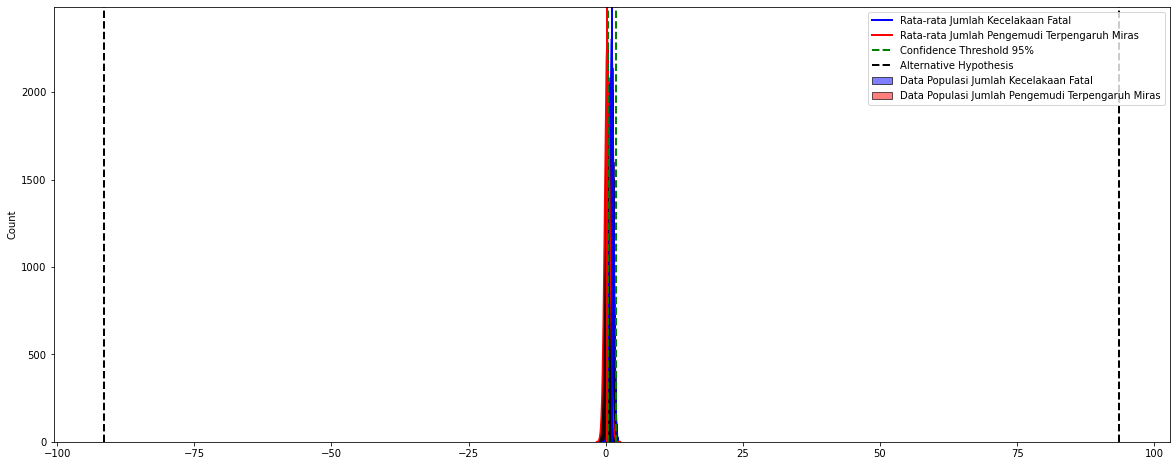

In [29]:
alfa = 0.05
t_hitung,nilai_p = stats.ttest_ind(data_fatal,data_drunks)

data_fatal_pop = np.random.normal(rata2_fatal,std_fatal,100000)
data_drunks_pop = np.random.normal(rata2_drunks,std_drunks,100000)
rata2_fatal_pop = data_fatal_pop.mean()
std_fatal_pop = data_fatal_pop.std()
nilai_ci = stats.norm.interval(0.95,rata2_fatal,std_fatal)

plt.figure(figsize=(20,8))
sns.histplot(data_fatal_pop,kde=True,label="Data Populasi Jumlah Kecelakaan Fatal",color="blue")
sns.histplot(data_drunks_pop,kde=True,label="Data Populasi Jumlah Pengemudi Terpengaruh Miras",color="red")
plt.axvline(rata2_fatal,color="blue",linewidth=2,label="Rata-rata Jumlah Kecelakaan Fatal")
plt.axvline(rata2_drunks,color="red",linewidth=2,label="Rata-rata Jumlah Pengemudi Terpengaruh Miras")
plt.axvline(nilai_ci[1],color="green",linestyle="dashed",linewidth=2,label="Confidence Threshold 95%")
plt.axvline(nilai_ci[0],color="green",linestyle="dashed",linewidth=2)
plt.axvline(rata2_fatal_pop+t_hitung*std_fatal_pop,color="black",linestyle="dashed",linewidth=2,label="Alternative Hypothesis")
plt.axvline(rata2_fatal_pop-t_hitung*std_fatal_pop,color="black",linestyle="dashed",linewidth=2)
plt.legend()
plt.show()

Berdasarkan uji hipotesis diatas diperoleh hasil bahwa garis H1 berada diluar area HO, yang menandakan bahwa H0 ditolak. Dalam kasus ini menunjukan bahwa rata-rata kecelakaan fatal itu tidak sama dengan rata-rata jumlah pengemudi yang terpengaruh minuman keras.

Sekarnag kita akan menguji apakah ada keterkaitan antara jumlah kecelakaan fatal dengan jumlah pengemudi yang terpengaruh minuman keras. Dalam kasus ini kita menggunakan uji ANOVA dan Paired Test dengan asumsi nilai alfa sebesar 5%.

Dalam kasus ini, hipotesis tersebut dinotasikan menjadi:

**H0: μ fatal = μ keadaan mabuk**

**H1: μ fatal != μ keadaan mabuk**

Mari kita lakukan uji ANOVA terlebih dahulu

In [30]:
f_hitung,p_value = stats.f_oneway(data_fatal,data_drunks)
print('P-value:',p_value)

P-value: 0.0


Sekarang kita uji menggunakan paired test

In [31]:
t_stat,p_val = stats.ttest_rel(data_fatal.sample(10000),data_drunks.sample(10000))
print('P-value:',p_val)

P-value: 0.0


Berdasarkan hasil pengujian menggunakan ANOVA dan Paired test, diperoleh hasil nilai P sebesar 0. Nilai ini berada dibawah nilai alfa yang memiliki arti bahwa Jumlah Kecelakaan fatal tidak ada keterkaitan dengan Jumlah Pengemudi yang terpengaruh minuman keras.

# Kesimpulan 
- Kecelakaan dengan angka terbesar terdapat pada negara bagian California dengan jumlah 3540 kecelakaan
- Kecelakaan dengan angka terkecil terdapat pada negara bagian Distric of Columbia dengan jumlah 26 kecelakaan
- Kecelakaan dengan angka terbesar terdapat pada non junction location dengan jumlah 23582 kecelakaan
- Kecelakaan dengan angka terkecil terdapat pada shared-use path crossing dengan jumlah 5 kecelakaan
- Kecelakaan dengan angka terbesar terdapat pada on roadway location dengan jumlah 21012 kecelakaan
- Kecelakaan dengan angka terkecil terdapat pada non reported location dengan jumlah 8 kecelakaan
- Kecelakaan dengan angka terbesar terdapat pada daylight condition dengan jumlah 16458 kecelakaan
- Kecelakaan dengan angka terkecil terdapat pada other condition dengan jumlah 8 kecelakaan
- Kecelakaan dengan angka terbesar terdapat pada clear condition dengan jumlah 24956 kecelakaan
- Kecelakaan dengan angka terkecil terdapat blowing snow condition dengan jumlah 13 kecelakaan
- Kecelakaan terbanyak terjadi di daerah amerika serikat bagian timur, sedangkan untuk daerah amerika serikat bagian barat tengah cenderung lebih sedikit.
- Rata-rata kecelakaan fatal itu tidak sama dengan rata-rata jumlah pengemudi yang terpengaruh minuman keras
- Jumlah Kecelakaan fatal tidak ada keterkaitan dengan Jumlah Pengemudi yang terpengaruh minuman keras

Maka Kebijakan yang perlu dibuat Kementrian Perhubungan adalah membuat aturan berkendara yang baru untuk negara bagian timur amerika serikat mengenai:
- Berkendara di area non junction
- Berkendara di area roadway
- Berkendara di waktu daylight
- Berkendara di cuaca clear.
- Membuat program razia rutin untuk mencegah pengemudi yang terpengaruh minuman keras.